### Python module/package imports for this chapter

In [1]:
import os, sys, collections, re, json, io, base64

Note that the Basemap installation can be finicky. In the Anaconda distribution, if

    conda install basemap

fails, you can try `conda install -c conda-forge basemap`. However, the package must be installed in a conda environment, which you create with (say)

    conda create -n myenv

and activate with

    source activate myenv
    
If you get an error that `PROJ_LIB` (or another variable) is not defined, try restarting the Jupyter server, or re-activating the environment. 

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
import requests
import bs4      # BeautifulSoup 4

In [4]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance  # Python Imaging Library - now "pillow"

## Making a Martian roll-through with `matplotlib`

In [5]:
open('locations.xml','r').readlines()[:19]

['<msl>\n',
 '  <location>\n',
 '    <site>00000</site>\n',
 '    <itemName>0000000000</itemName>\n',
 '    <lon>137.4416334989196</lon>\n',
 '    <rot>0.014572, -0.034982, 0.831579, 0.554112</rot>\n',
 '    <endSol>00000</endSol>\n',
 '    <dateAdded>2020-03-13T14:38:59Z</dateAdded>\n',
 '    <startSol>00000</startSol>\n',
 '    <arrivalTime>2012-08-05T13:49:59Z</arrivalTime>\n',
 '    <mapPixelH>82253.03164549096</mapPixelH>\n',
 '    <drive>00000</drive>\n',
 '    <contributor>Team MSLICE</contributor>\n',
 '    <mapPixelV>123500.99039381815</mapPixelV>\n',
 '    <z>0.0</z>\n',
 '    <lat>-4.5894669521344875</lat>\n',
 '    <y>0.0</y>\n',
 '    <x>0.0</x>\n',
 '  </location>\n']

In [6]:
xml = bs4.BeautifulSoup(open('locations.xml','r'),'lxml-xml')

In [7]:
locations = xml.find_all('location')

In [8]:
len(locations)

23722

In [9]:
coords = collections.OrderedDict()

for location in locations:
    coords[location.site.string] = (float(location.lon.string),float(location.lat.string))

In [10]:
coords

OrderedDict([('00000', (137.4416334989196, -4.5894669521344875)),
             ('00001', (137.44163349082447, -4.589466943324896)),
             ('00002', (137.44163348272937, -4.589466934515306)),
             ('00003', (137.44289138782085, -4.590128714785257)),
             ('00004', (137.44835135793426, -4.590019479253231)),
             ('00005', (137.44915564374458, -4.589470392372824)),
             ('00006', (137.44863654627525, -4.590494796380398)),
             ('00007', (137.4470826644446, -4.590716133557534)),
             ('00008', (137.44424993588683, -4.593046696341203)),
             ('00009', (137.44190734237193, -4.594153334118832)),
             ('00010', (137.4398783081202, -4.596309147118519)),
             ('00011', (137.43692098899373, -4.597512781037194)),
             ('00012', (137.43381619917145, -4.5998414715149325)),
             ('00013', (137.43049614566226, -4.600504253037245)),
             ('00014', (137.4280326968518, -4.603861355310208)),
            

In [11]:
lonlat = np.fromiter(coords.values(),dtype=[('lon','d'),('lat','d')])

In [12]:
lonlat

array([(137.4416335 , -4.58946695), (137.44163349, -4.58946694),
       (137.44163348, -4.58946693), (137.44289139, -4.59012871),
       (137.44835136, -4.59001948), (137.44915564, -4.58947039),
       (137.44863655, -4.5904948 ), (137.44708266, -4.59071613),
       (137.44424994, -4.5930467 ), (137.44190734, -4.59415333),
       (137.43987831, -4.59630915), (137.43692099, -4.59751278),
       (137.4338162 , -4.59984147), (137.43049615, -4.60050425),
       (137.4280327 , -4.60386136), (137.42627708, -4.60706205),
       (137.42391457, -4.60952712), (137.42243351, -4.61177994),
       (137.42077479, -4.61521753), (137.41944592, -4.61800093),
       (137.41716956, -4.61998923), (137.41504573, -4.62227315),
       (137.41312567, -4.62243505), (137.41113896, -4.62422006),
       (137.41030857, -4.62522045), (137.40739507, -4.62672499),
       (137.40425149, -4.62698738), (137.40049601, -4.62968937),
       (137.39977318, -4.6325471 ), (137.40095758, -4.63475087),
       (137.4029379 , -4.

/Users/vallis/anaconda3/envs/lynda2/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


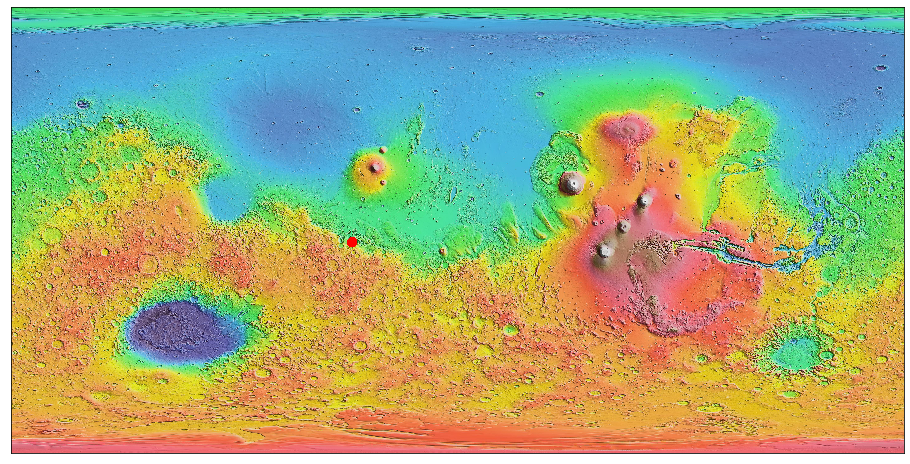

In [13]:
mars = PIL.Image.open('mars_cylindrical.jpg')

pp.figure(figsize=(16,10))

world = Basemap(lon_0 = 180)

world.imshow(mars,origin='upper')
world.plot(lonlat['lon'],lonlat['lat'],'r.',ms=15,latlon=True)

(137.3, 137.5, -4.8, -4.4)

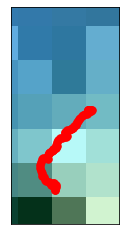

In [14]:
world.imshow(mars,origin='upper')
world.plot(lonlat['lon'],lonlat['lat'],'r.',ms=15,latlon=True)

pp.axis(xmin=137.3,xmax=137.5,ymin=-4.8,ymax=-4.4)

(135.6, 139.9, -7.5, -3.2)

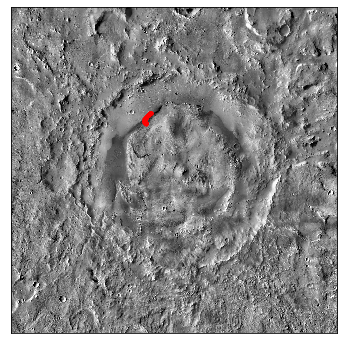

In [15]:
crater = PIL.Image.open('gale_themis_vis_fix_v4_reduced.png')

pp.figure(figsize=(12,6))

pp.imshow(crater,origin='upper',interpolation='none',
          cmap=pp.get_cmap('gray'),
          extent=[135.6,139.9,-7.5,-3.2])
world.plot(lonlat['lon'],lonlat['lat'],'r.',latlon=True)

pp.axis(xmin=135.6,xmax=139.9,ymin=-7.5,ymax=-3.2)

(137, 138, -5, -4.5)

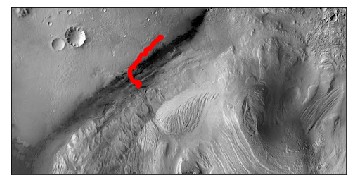

In [16]:
pp.imshow(crater,origin='upper',interpolation='none',
          cmap=pp.get_cmap('gray'),
          extent=[135.6,139.9,-7.5,-3.2])
world.plot(lonlat['lon'],lonlat['lat'],'r.',latlon=True)

pp.axis(xmin=137,xmax=138,ymin=-5,ymax=-4.5)